In [1]:
import pandas as pd, geopandas as gpd, matplotlib.pyplot as plt
import contextily as cx
%matplotlib inline

In [2]:
df_wide = pd.read_excel(path + 'generales2021_long.xlsx', sheet_name='wide')
df_wide = df_wide[df_wide['DISTRITO']==1].dropna(how='all',axis=1)
print(df_wide.shape)
df_wide.head(2)

(7377, 13)


DISTRITO  SECCION CIRCUITO  MESA  MESA_TOTAL_ELECTORES  \
0         1        1        1     1                   351   
1         1        1        1     2                   351   

   MESA_TOTAL_AFIRMATIVOS  MESA_TOTAL_BLANCOS  MESA_TOTAL_NULOS  \
0                     234                   1                 2   
1                     234                   0                 5   

   AUTODETERMINACIÓN Y LIBERTAD  \
0                           6.0   
1                           7.0   

   FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD  FRENTE DE TODOS  \
0                                            25.0             75.0   
1                                            21.0             79.0   

   JUNTOS POR EL CAMBIO  LA LIBERTAD AVANZA  
0                  80.0                48.0  
1                  88.0                39.0

In [3]:
idx = ['DISTRITO','SECCION', 'CIRCUITO']
values = ['MESA_TOTAL_ELECTORES','MESA_TOTAL_AFIRMATIVOS', 'MESA_TOTAL_BLANCOS', 'MESA_TOTAL_NULOS','AUTODETERMINACIÓN Y LIBERTAD',
          'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 'FRENTE DE TODOS','JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA']
df = df_wide.pivot_table(index=idx, values=values, aggfunc='sum').reset_index()
df.head(2)

DISTRITO  SECCION  CIRCUITO  AUTODETERMINACIÓN Y LIBERTAD  \
0         1        1         1                         228.0   
1         1        1         2                         212.0   

   FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD  FRENTE DE TODOS  \
0                                           672.0           2239.0   
1                                           646.0           2189.0   

   JUNTOS POR EL CAMBIO  LA LIBERTAD AVANZA  MESA_TOTAL_AFIRMATIVOS  \
0                2550.0              1116.0                    6805   
1                2185.0              1014.0                    6246   

   MESA_TOTAL_BLANCOS  MESA_TOTAL_ELECTORES  MESA_TOTAL_NULOS  
0                  56                 10471                85  
1                  66                  9577                78

In [4]:
partidos = ['AUTODETERMINACIÓN Y LIBERTAD','FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 'FRENTE DE TODOS','JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA']

for c in partidos:
    df[c + '_%'] = (df[c] / df['MESA_TOTAL_AFIRMATIVOS']*100).round(2)
    
df.head(2)

DISTRITO  SECCION  CIRCUITO  AUTODETERMINACIÓN Y LIBERTAD  \
0         1        1         1                         228.0   
1         1        1         2                         212.0   

   FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD  FRENTE DE TODOS  \
0                                           672.0           2239.0   
1                                           646.0           2189.0   

   JUNTOS POR EL CAMBIO  LA LIBERTAD AVANZA  MESA_TOTAL_AFIRMATIVOS  \
0                2550.0              1116.0                    6805   
1                2185.0              1014.0                    6246   

   MESA_TOTAL_BLANCOS  MESA_TOTAL_ELECTORES  MESA_TOTAL_NULOS  \
0                  56                 10471                85   
1                  66                  9577                78   

   AUTODETERMINACIÓN Y LIBERTAD_%  \
0                            3.35   
1                            3.39   

   FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD_%  FRENTE DE TODOS_%  \
0                                              9.88              32.90   
1                                             10.34              35.05   

   JUNTOS POR EL CAMBIO_%  LA LIBERTAD AVANZA_%  
0                   37.47                 16.40  
1                   34.98                 16.23

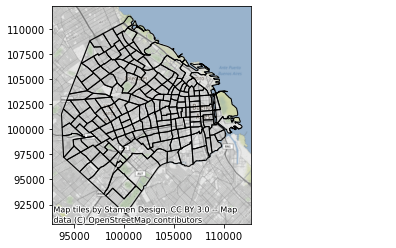

In [5]:
path = r'circuito_01_caba\circuitos-electorales.shp'
circ = gpd.read_file(path)
ax=circ.plot(facecolor='none')
cx.add_basemap(ax, crs=circ.crs.to_string())

In [6]:
circ_idx = circ[['COMUNA','CIRCUITO_N']]
df_idx = df[['SECCION','CIRCUITO']]

match = pd.merge(circ_idx, df_idx, left_on=['COMUNA','CIRCUITO_N'], right_on=['SECCION','CIRCUITO'], how='outer', indicator=True)
match._merge.value_counts()

both          167
left_only       0
right_only      0
Name: _merge, dtype: int64

<AxesSubplot:>

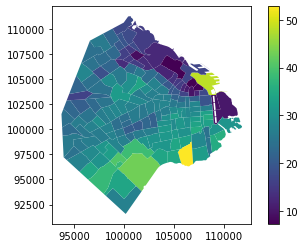

In [7]:
gdf = pd.merge(circ, df, left_on=['COMUNA','CIRCUITO_N'], right_on=['SECCION','CIRCUITO'], how='left')
gdf.plot(column='FRENTE DE TODOS_%', legend=True)

<AxesSubplot:>

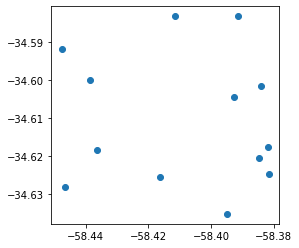

In [9]:
# puntos
puntos = pd.DataFrame(
    {
        "puntos": ["Scalabrini y Corrientes", "Tribunales", "Callao y Corrientes", "San Juan y Boedo", "Dorrego y Corrientes",'Constitución','Independiencia y 9 de Julio',
                  'Parque Ameghino','Acoyte y Rivadavia','F. Sociales', 'F. de Filosofía y Letras','F. de Derecho','UNA'],
        "Latitude": [-34.599924874160855, -34.6015285693268, -34.60455235563457, -34.62557757701761, -34.591761630074494,-34.62471725493822, -34.61775968591228,
                    -34.63525007388467,-34.61849450586704,-34.62046602056693,-34.62828700296028,-34.58322868466664,-34.58325348292786],
        "Longitude": [-58.438799458886905, -58.38390951415273, -58.39249532550444, -58.416294811864084,  -58.44774508842745,-58.381476127096064,-58.381761513296574,
                     -58.394978270394674,-58.436588296326036,-58.384531934971875,-58.44669912005553, -58.39135338132851,-58.41163798693495]
    }
)

puntos = gpd.GeoDataFrame(
    puntos, geometry=gpd.points_from_xy(mesitas.Longitude, mesitas.Latitude), crs="EPSG:4326"
)
puntos.plot()

## MAPAS

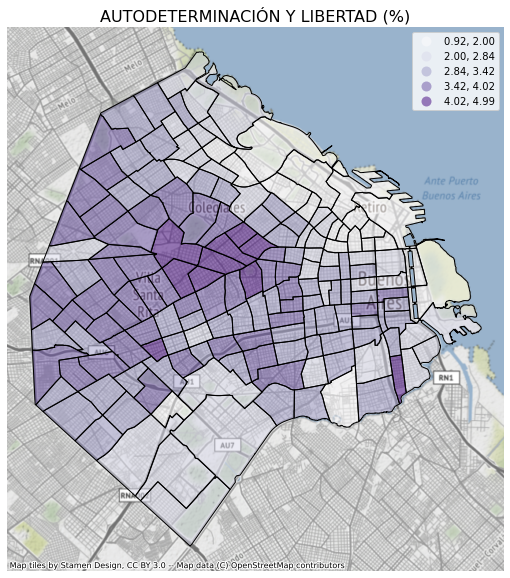

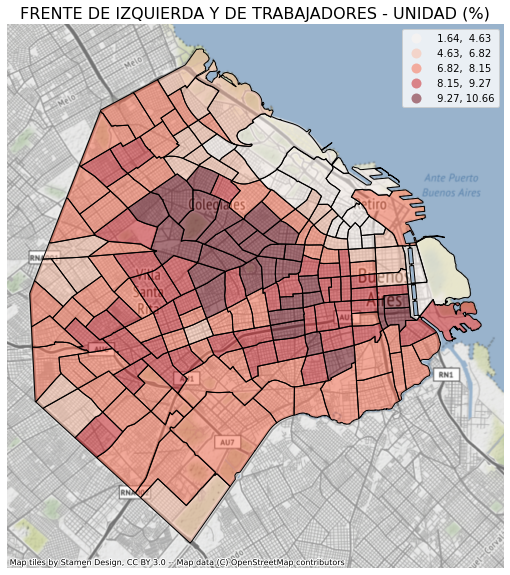

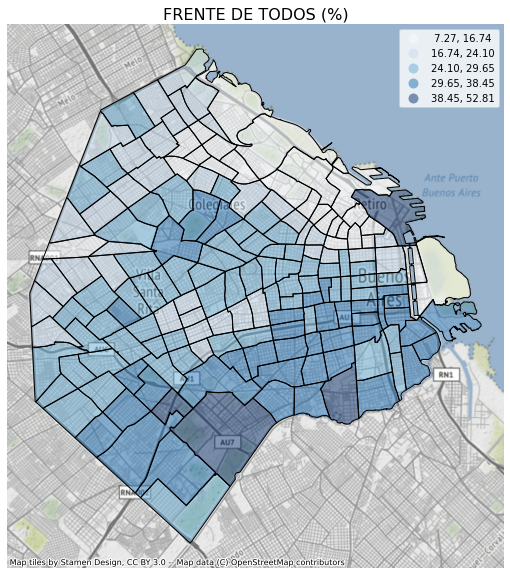

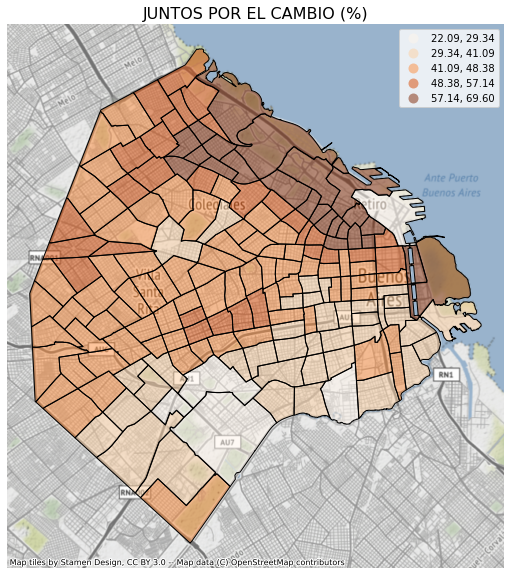

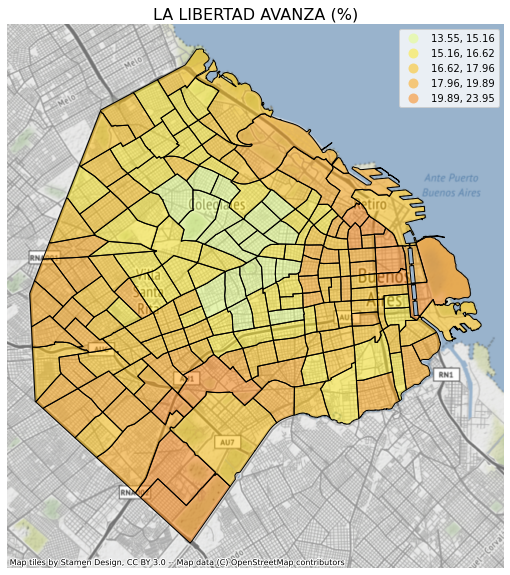

In [10]:
partidos_p = [c + '_%' for c in partidos]
colors = ['Purples','Reds','Blues','Oranges','Wistia']
for c, color in zip(partidos_p, colors):
    fig, ax = plt.subplots(figsize=(10,10))
    gdf.plot(column=c, ax=ax, alpha=.5, scheme='FisherJenks', k=5, legend=True, cmap=color)
    circ.plot(ax=ax, facecolor='none', edgecolor='k')
    ax.set_title(c.replace('_%',' (%)'), fontsize=16), ax.set_axis_off()
    cx.add_basemap(ax, crs=gdf.crs.to_string())
    plt.show()
    gdf.explore()
#     break

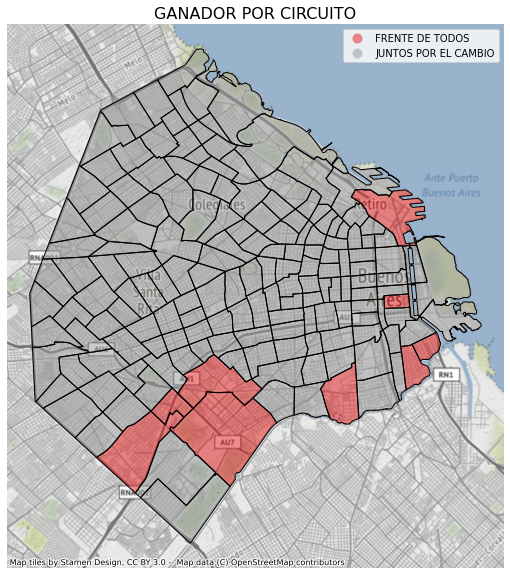

In [11]:
gdf['ganador'] = gdf[partidos].idxmax(axis=1)
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(column='ganador', ax=ax, alpha=.5,legend=True, categorical=True, cmap='Set1')
circ.plot(ax=ax, facecolor='none', edgecolor='k')
ax.set_title('GANADOR POR CIRCUITO', fontsize=16), ax.set_axis_off()
cx.add_basemap(ax, crs=gdf.crs.to_string())

In [12]:
gdf.explore(column=partidos_p[0], cmap=colors[0], scheme='FisherJenks',k=5)

In [13]:
gdf.explore(column=partidos_p[1], cmap=colors[1], scheme='FisherJenks',k=5)

In [14]:
gdf.explore(column=partidos_p[2], cmap=colors[2], scheme='FisherJenks',k=5)

In [15]:
gdf.explore(column=partidos_p[3], cmap=colors[3], scheme='FisherJenks',k=5)

In [16]:
gdf.explore(column=partidos_p[4], cmap=colors[4], scheme='FisherJenks',k=5)